# Main Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import timeit
import math
import copy

class Point():
    def __init__(self,x,y):
        self.x = x
        self.y = y
        

class Environment():
    
    def __init__(self):
            
        self.set1 = 0
        self.set2 = 0
        self.dataset = 0
        self.alpha = 0.1
            
    def generatedataset(self):    
        mean = [3, 3]
        cov = [[1, 0], [0, 1]]
        a = np.random.multivariate_normal(mean, cov, 500).T

        mean = [-3, -3]
        cov = [[2, 0], [0 , 5 ]]
        b = np.random.multivariate_normal(mean, cov , 500 ).T
        
        c = np.concatenate ((a, b), axis=1)
        c = c.T
        np.random.shuffle(c)
        c = c.T
        self.set1 = a
        self.set2 = b
        self.dataset = c
       
    # Creates a list of the points object
    def generatepoints(self):
        list_of_points = []
        for i in range(len(self.dataset[0])):
            list_of_points.append(Point(self.dataset[0][i], self.dataset[1][i]))
        return list_of_points
    
    #calculates euclidian distance between points
    def closer(self, point, p1, p2):
        dist1 = math.sqrt( (point.x - p1.x)*(point.x - p1.x) + (point.y - p1.y) * (point.y - p1.y))
        dist2 = math.sqrt( (point.x - p2.x)*(point.x - p2.x) + (point.y - p2.y) * (point.y - p2.y))
        if(dist1 < dist2):
            return True
        else:
            return False
        
    # returns the distance between two points
    def distance(self, p1, p2):
        return math.sqrt((p1.x - p2.x)*(p1.x - p2.x) + (p1.y - p2.y) * (p1.y - p2.y))
 
    def parameter(self, point):
        if (point.x and point.y) in self.set1:
            return True
        else:
            return False
        
    # get the average of two points
    def mean(self, point1, point2):
        x = (point1.x + point2.x)/2
        y = (point1.y + point2.y)/2
        return Point(x, y)

    
    # brute force algorithm that returns the closest points
    def brute_search(self, list_of_points):
        dist = float('inf')
        point1 = Point(0,0) 
        point2 = Point(0,0) 
        index1 = 0
        index2 = 0
        for i in range(len(list_of_points)):
            for j in range(i + 1, len(list_of_points)):
                p1 = list_of_points[i]
                p2 = list_of_points[j]
                temp = self.distance(p1, p2)
                if temp < dist and temp > 0 :
                    dist = temp
                    point1 =  p1
                    point2 =  p2
                    index1 = i
                    index2 = j
        return (dist, point1, point2, index1, index2)
    
    
    def sortarrays(self, list_of_points):
        #Sort the arrays according to x and y coordinates
        list_of_points.sort(key = lambda point: point.x)
        list_of_pointsy = copy.deepcopy(list_of_points)
        list_of_pointsy.sort(key = lambda point: point.y) 
        return list_of_points , list_of_pointsy

    
    # divide and conquer algorithm that returns the closest points and their index
    def divide_conquer(self, list_of_points, list_of_pointsy):  

        if len(list_of_points) <= 3:
            return self.brute_search(list_of_points)
            
        mid = len(list_of_points) // 2
        
        # copy of left and right branch
        Qx = list_of_points[:mid]
        Rx = list_of_points[mid:]
        
        median_x = list_of_points[mid]
        
        Qy,Ry = [], []
        
        for point in list_of_pointsy:
            if point.x < median_x.x:
                Qy.append(point)
            else:
                Ry.append(point)
        
        min_dist_left  = self.divide_conquer(Qx, Qy)
        min_dist_right = self.divide_conquer(Rx, Ry) 
        
        if(min_dist_left[0] <  min_dist_right[0]):
            min_dist = min_dist_left
        else:
            min_dist = min_dist_right
            
        x_bar = Qx[-1].x
        Sy = []
        for y in list_of_pointsy:
            if x_bar - min_dist[0] < y.x < x_bar + min_dist[0]:
                Sy.append(y)

        Best_pair = (0,0)
        for i in range(len(Sy) - 1):
            for j in range(i + 1, min( i + 7, len(Sy)) ):
                P = Sy[i]
                Q = Sy[j]
                dist = self.distance(P,Q)
                if dist < min_dist[0]:
                    min_dist = (dist,P,Q,i,j)
        return min_dist
        
          
    def core(self, epsilon, minpoints, list_of_points, current_point):
        temp = []
        dist = 0
        count = 0
        #get points that are within epsilon distance of the current point
        for p in list_of_points:         
            dist = abs(self.distance(p, current_point))
            #saves the indexes of the neighbours points
            if dist <= epsilon and dist > 0:
                temp.append(count)              
            count += 1
        #check how many points are present within radius
        #return format (indexes, is_core, is_border, is_noise)
        if len(temp) >= minpoints:
            return (temp , True, False, False)
        elif (len(temp) < minpoints) and len(temp) > 0:
            return (temp , False, True, False)
        elif len(temp) == 0:
            return (temp , False, False, True)


# EX 1a

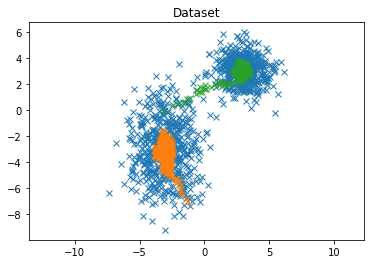

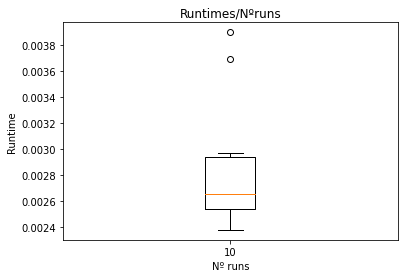

Converge para a média de cada parametro


In [81]:
random.seed(1)
e = Environment()
e.generatedataset()

# chooses random indexes
r1_index = random.randint(0,1000)
r2_index = random.randint(0,1000)

#Turn the dataset into a list of Point object
list_of_points = e.generatepoints()

# gets the points in those indexes
point1 =  list_of_points[r1_index]
point2 =  list_of_points[r2_index]

# initialization 
passage1x = []
passage1y = []
passage2x = []
passage2y = []
runtime = []
runs = 10

for count in range(runs):
    start = timeit.default_timer() 
    for x in range(len(list_of_points)):
        
        point = list_of_points[x]
        
        # checks if the point is generated using parameter 1 or 2
        condition = e.closer(point, point1, point2)
        
        if(condition):
            point1.x = point1.x * (1-e.alpha) + point.x * e.alpha
            point1.y = point1.y * (1-e.alpha) + point.y * e.alpha
            if(count == 0):
                passage1x.append(point1.x)
                passage1y.append(point1.y)
                
        else:
            point2.x = point2.x * (1-e.alpha) + point.x * e.alpha
            point2.y = point2.y * (1-e.alpha) + point.y * e.alpha 
            if(count == 0):
                passage2x.append(point2.x)
                passage2y.append(point2.y)
                
    stop = timeit.default_timer()
    runtime.append(stop-start)

#PLOTTING
plt.plot(e.dataset[0], e.dataset[1], 'x')

plt.plot(passage1x, passage1y, 'x')
plt.plot(passage2x, passage2y, 'x')

plt.title('Dataset')
plt.axis('equal')
plt.show()

plt.ylabel('Runtime')
plt.xlabel('Nº runs')
plt.title('Runtimes/Nºruns')
plt.boxplot(runtime, positions = [runs] )
plt.show()

print('Converge para a média de cada parametro')

# Ex 1b

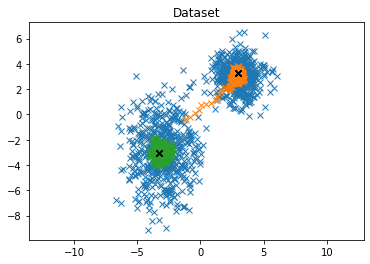

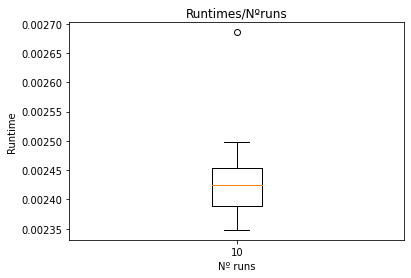

Converge para a média de cada parametro


In [7]:
random.seed(1)
e = Environment()
e.generatedataset()

# chooses random indexes
r1_index = random.randint(0,1000)
r2_index = random.randint(0,1000)

#Turn the dataset into a list of Point object
list_of_points = e.generatepoints()

# gets the points in those indexes
point1 =  list_of_points[r1_index]
point2 =  list_of_points[r2_index]

# initialization 
passage1x = []
passage1y = []
passage2x = []
passage2y = []
finalp1x = []
finalp1y = []
finalp2x = []
finalp2y = []
runtime = []
runs = 10

for count in range(runs):
    start = timeit.default_timer() 
    for x in range(len(list_of_points)):
        
        point = list_of_points[x]
        
        # checks if the point is generated using parameter 1 or 2
        condition = e.closer(point, point1, point2)
        
        if(condition):
            point1.x = point1.x * (1-e.alpha) + point.x * e.alpha
            point1.y = point1.y * (1-e.alpha) + point.y * e.alpha
            if(count == 0):
                passage1x.append(point1.x)
                passage1y.append(point1.y)
                
        else:
            point2.x = point2.x * (1-e.alpha) + point.x * e.alpha
            point2.y = point2.y * (1-e.alpha) + point.y * e.alpha 
            if(count == 0):
                passage2x.append(point2.x)
                passage2y.append(point2.y)
                
    stop = timeit.default_timer()
    runtime.append(stop-start)
    finalp1x.append(point1.x)
    finalp1y.append(point1.y)
    finalp2x.append(point2.x)
    finalp2y.append(point2.y)

#PLOTTING
plt.plot(e.dataset[0], e.dataset[1], 'x')

plt.plot(passage1x, passage1y,'x')
plt.plot(passage2x, passage2y,'x')

plt.plot(finalp1x, finalp1y,'x', color ='k')
plt.plot(finalp2x, finalp2y,'x', color ='k')

plt.title('Dataset')
plt.axis('equal')
plt.show()

plt.ylabel('Runtime')
plt.xlabel('Nº runs')
plt.title('Runtimes/Nºruns')
plt.boxplot(runtime, positions = [runs] )
plt.show()

print('Converge para a média de cada parametro')

# EX 2

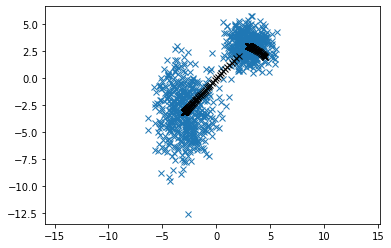

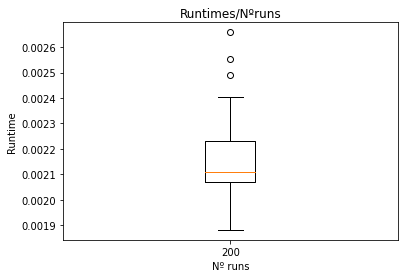

Continua a convergir para a média de cada parametro


In [6]:
random.seed(1)
e = Environment()
e.generatedataset()

# chooses random indexes
r1_index = random.randint(0,1000)
r2_index = random.randint(0,1000)

#Turn the dataset into a list of Point object
list_of_points = e.generatepoints()

# gets the points in those indexes
point1 =  list_of_points[r1_index]
point2 =  list_of_points[r2_index]

# initialization 
passage1x = []
passage1y = []
passage2x = []
passage2y = []
finalp1x = []
finalp1y = []
finalp2x = []
finalp2y = []

runs = 200 
runtime = []

for count in range(runs): 
    
    acc1 = Point(0,0)
    acc2 = Point(0,0)
    
    start = timeit.default_timer() 
    
    for i in range(len(list_of_points)):
        point = list_of_points[i]
        
        # checks to which point is closer which parameter was used to generate
        condition = e.closer(point, point1, point2)
        
        if(condition):
            acc1.x += point.x - point1.x
            acc1.y += point.y - point1.y
        else:
            acc2.x += point.x - point2.x
            acc2.y += point.y - point2.y

    point1.x += acc1.x * (e.alpha/1000)
    point1.y += acc1.y * (e.alpha/1000)
    point2.x += acc2.x * (e.alpha/1000)
    point2.y += acc2.y * (e.alpha/1000)
    finalp1x.append(point1.x)
    finalp1y.append(point1.y)
    finalp2x.append(point2.x)
    finalp2y.append(point2.y)
    
    stop = timeit.default_timer()
    runtime.append(stop-start)
       
        
#PLOTTING
plt.plot(e.dataset[0], e.dataset[1], 'x')

plt.plot(finalp1x, finalp1y,'x', color ='k')
plt.plot(finalp2x, finalp2y,'x', color ='k')
plt.axis('equal')
plt.show()       
        
plt.ylabel('Runtime')
plt.xlabel('Nº runs')
plt.title('Runtimes/Nºruns')
plt.boxplot(runtime, positions = [runs] )
plt.show()        

print('Continua a convergir para a média de cada parametro')

# Ex 2b

Iteration Nº 0


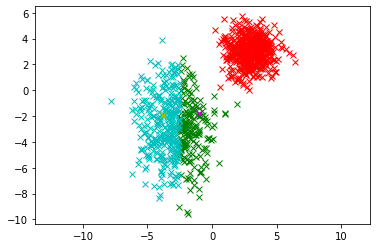

Iteration Nº 2


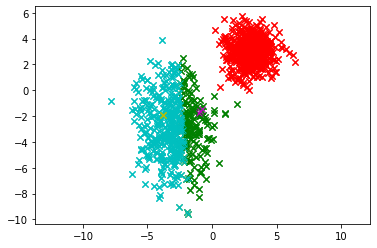

Iteration Nº 4


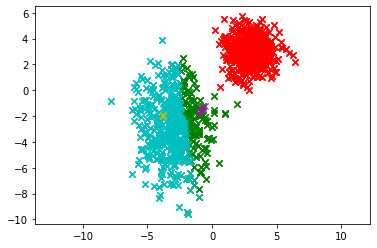

Iteration Nº 6


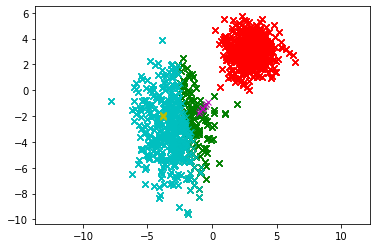

Iteration Nº 8


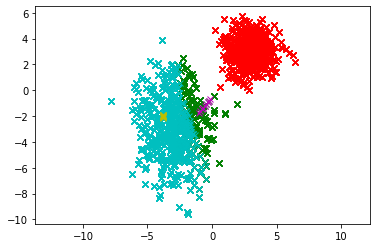

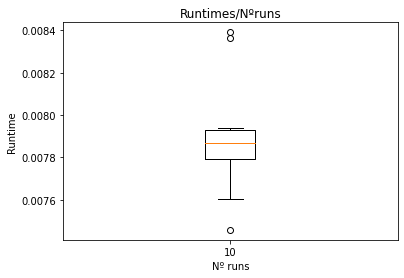

Continua a convergir para a média de cada parametro


In [38]:
random.seed(1)
e = Environment()
e.generatedataset()

# chooses random indexes
r1_index = random.randint(0,1000)
r2_index = random.randint(0,1000)

#Turn the dataset into a list of Point object
list_of_points = e.generatepoints()

# gets the points in those indexes
point1 =  list_of_points[r1_index]
point2 =  list_of_points[r2_index]

# initialization 
passage1x = []
passage1y = []
passage2x = []
passage2y = []
finalp1x = []
finalp1y = []
finalp2x = []
finalp2y = []

runs = 10 
runtime = []

redx = []
redy = []
greenx = []
greeny = []
bluex = []
bluey = []
cyanx = []
cyany = []


for count in range(runs): 
    
    acc1 = Point(0,0)
    acc2 = Point(0,0)
    
    start = timeit.default_timer() 
    
    for i in range(len(list_of_points)):
        point = list_of_points[i]
        
        # checks to which point is closer which parameter was used to generate
        condition = e.closer(point, point1, point2)
        label = e.parameter(point)
        
        if(condition):
            acc1.x += point.x - point1.x
            acc1.y += point.y - point1.y
            if label:
                redx.append(point.x)
                redy.append(point.y)
            else:
                greenx.append(point.x)
                greeny.append(point.y)
        else:
            acc2.x += point.x - point2.x
            acc2.y += point.y - point2.y
            
            if label:
                bluex.append(point.x)
                bluey.append(point.y)
            else:
                cyanx.append(point.x)
                cyany.append(point.y)
    
    point1.x += acc1.x * (e.alpha/1000)
    point1.y += acc1.y * (e.alpha/1000)
    point2.x += acc2.x * (e.alpha/1000)
    point2.y += acc2.y * (e.alpha/1000)
    finalp1x.append(point1.x)
    finalp1y.append(point1.y)
    finalp2x.append(point2.x)
    finalp2y.append(point2.y)
    
    stop = timeit.default_timer()
    runtime.append(stop-start)
    
    #PLOTTING
    if(count % 2) == 0:
        print('Iteration Nº', count)
        #colored set
        if redx: 
            plt.plot(redx, redy,'x', color ='r')
        if greenx:  
            plt.plot(greenx, greeny, 'x' ,color ='g')
        if bluex:
            plt.plot(bluex, bluey,'x', color = 'b')
        if cyanx:
            plt.plot(cyanx, cyany, 'x', color ='c')

        #consecutive values
        plt.plot(finalp1x, finalp1y,'x', color ='m')
        plt.plot(finalp2x, finalp2y,'x', color ='y')

        plt.axis('equal')
        plt.show()
        plt.clf()
        
plt.ylabel('Runtime')
plt.xlabel('Nº runs')
plt.title('Runtimes/Nºruns')
plt.boxplot(runtime, positions = [runs] )
plt.show()        

print('Continua a convergir para a média de cada parametro')

# Ex 2c

Iteration Nº 0


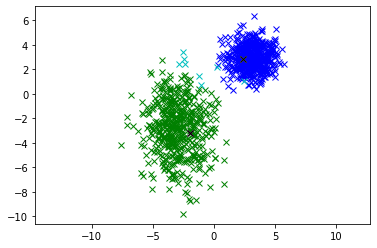

Iteration Nº 5


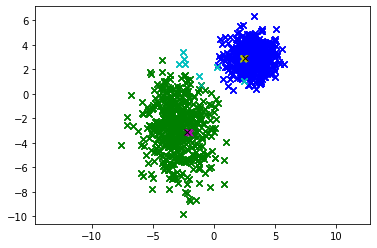

Iteration Nº 10


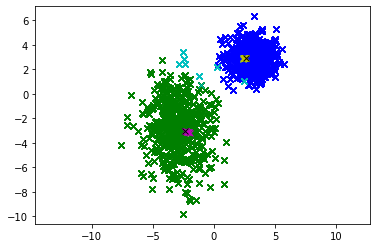

Iteration Nº 15


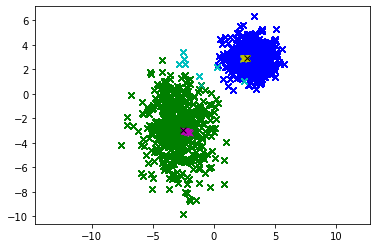

Iteration Nº 20


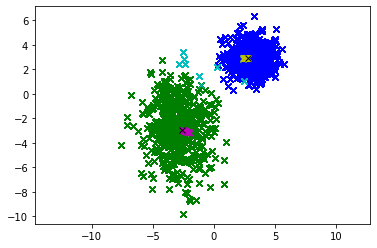

Iteration Nº 25


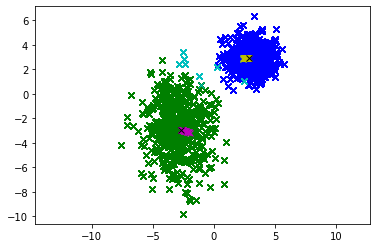

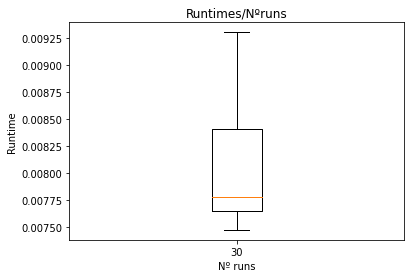

Continua a convergir para a média de cada parametro


In [3]:
random.seed(1)
e = Environment()
e.generatedataset()

# chooses random indexes
r1_index = random.randint(0,1000)
r2_index = random.randint(0,1000)

#Turn the dataset into a list of Point object
list_of_points = e.generatepoints()

# gets the points in those indexes
point1 =  list_of_points[r1_index]
point2 =  list_of_points[r2_index]

# initialization 
passage1x = []
passage1y = []
passage2x = []
passage2y = []
finalp1x = []
finalp1y = []
finalp2x = []
finalp2y = []

runs = 30 
runtime = []

redx = []
redy = []
greenx = []
greeny = []
bluex = []
bluey = []
cyanx = []
cyany = []


for count in range(runs): 
    
    acc1 = Point(0,0)
    acc2 = Point(0,0)
    
    start = timeit.default_timer() 
    
    for i in range(len(list_of_points)):
        point = list_of_points[i]
        
        # checks to which point is closer which parameter was used to generate
        condition = e.closer(point, point1, point2)
        label = e.parameter(point)
        
        if(condition):
            acc1.x += point.x - point1.x
            acc1.y += point.y - point1.y
            if label:
                redx.append(point.x)
                redy.append(point.y)
            else:
                greenx.append(point.x)
                greeny.append(point.y)
        else:
            acc2.x += point.x - point2.x
            acc2.y += point.y - point2.y
            
            if label:
                bluex.append(point.x)
                bluey.append(point.y)
            else:
                cyanx.append(point.x)
                cyany.append(point.y)
    
    point1.x += acc1.x * (e.alpha/1000)
    point1.y += acc1.y * (e.alpha/1000)
    point2.x += acc2.x * (e.alpha/1000)
    point2.y += acc2.y * (e.alpha/1000)
    finalp1x.append(point1.x)
    finalp1y.append(point1.y)
    finalp2x.append(point2.x)
    finalp2y.append(point2.y)
    
    stop = timeit.default_timer()
    runtime.append(stop-start)
    
    #PLOTTING
    if(count % 5) == 0:
        print('Iteration Nº', count)
        #colored set
        if redx: 
            plt.plot(redx, redy,'x', color ='r')
        if greenx:  
            plt.plot(greenx, greeny, 'x' ,color ='g')
        if bluex:
            plt.plot(bluex, bluey,'x', color = 'b')
        if cyanx:
            plt.plot(cyanx, cyany, 'x', color ='c')

        #consecutive values
        plt.plot(finalp1x, finalp1y,'x', color ='m')
        plt.plot(finalp2x, finalp2y,'x', color ='y')

        #final values
        plt.plot(point1.x, point1.y,'x', color ='k')
        plt.plot(point2.x, point2.y,'x', color ='k')

        plt.axis('equal')
        plt.show()
        plt.clf()
        
plt.ylabel('Runtime')
plt.xlabel('Nº runs')
plt.title('Runtimes/Nºruns')
plt.boxplot(runtime, positions = [runs] )
plt.show()        

print('Continua a convergir para a média de cada parametro')

# EX 3 Divide and Conquer

Dataset still has: 900 points


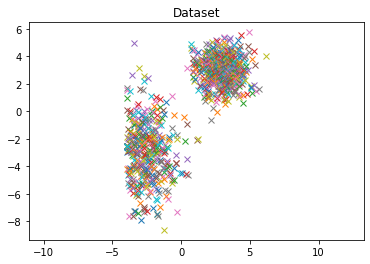

Dataset still has: 800 points


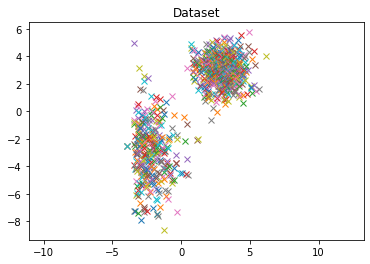

Dataset still has: 700 points


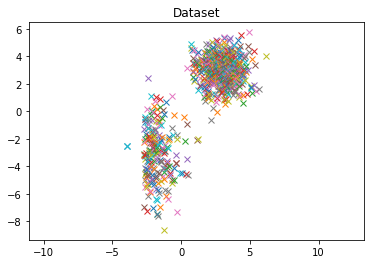

Dataset still has: 600 points


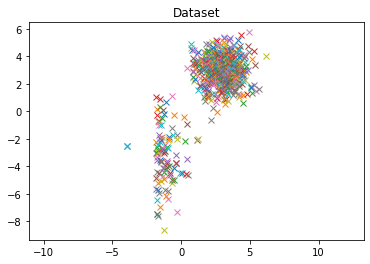

Dataset still has: 500 points


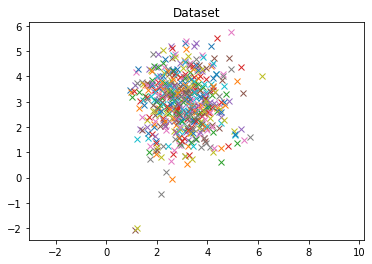

Dataset still has: 400 points


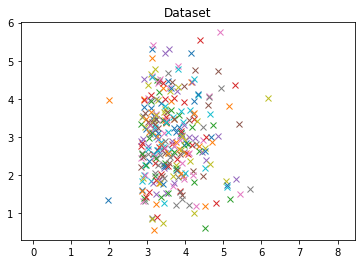

Dataset still has: 300 points


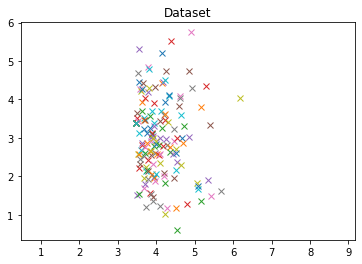

Dataset still has: 200 points


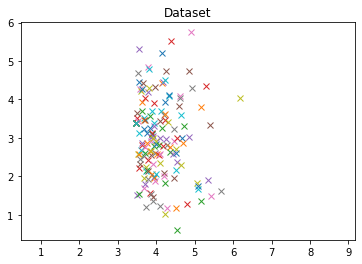

Dataset still has: 100 points


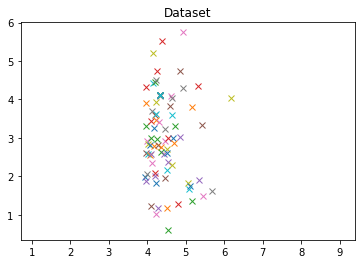

Took 21.918733400000065 seconds


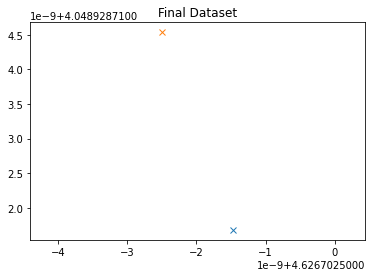

In [4]:
e = Environment()
e.generatedataset()

#Turn the dataset into a list of Point object
list_of_points = e.generatepoints()

start = timeit.default_timer()

while(len(list_of_points) > 2):
    
    # Sort the list by x and y values 
    list_of_points, list_of_pointsy = e.sortarrays(list_of_points)
    # Divide and Conquer algorithm
    vals = e.divide_conquer(list_of_points, list_of_pointsy) 
    
    # removes the points from the list
    del list_of_points[vals[3]]
    del list_of_pointsy[vals[3]]
    
    # calculates the mean and adds it to the list
    list_of_points.append(e.mean(vals[1], vals[2]))
    
    del list_of_points[vals[4]]
    del list_of_pointsy[vals[4]]
    # PLOTTING
    if(len(list_of_points) % 100) == 0:
        print('Dataset still has:', len(list_of_points), 'points')
        for p in list_of_points:
            plt.plot(p.x, p.y, 'x')
            plt.axis('equal')
        plt.title('Dataset')
        plt.show()
        plt.clf()
        
stop = timeit.default_timer()
time = stop - start

print('Took', time, 'seconds')        
for p in list_of_points: 
    plt.plot(p.x, p.y, 'x')
    plt.axis('equal')
plt.title('Final Dataset')
plt.show()

# EX 3 Brute Force

Dataset still has: 900 points


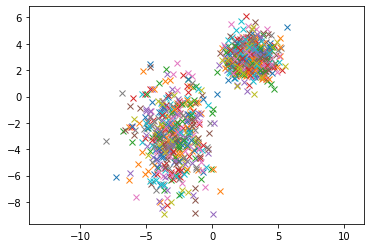

Dataset still has: 800 points


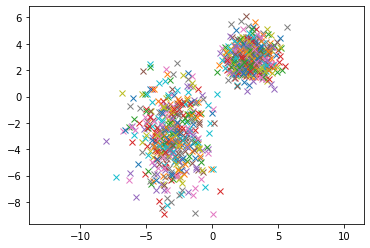

Dataset still has: 700 points


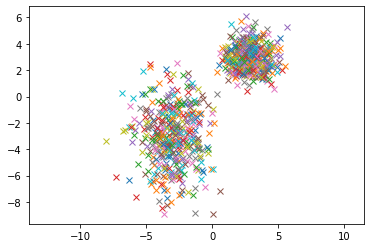

Dataset still has: 600 points


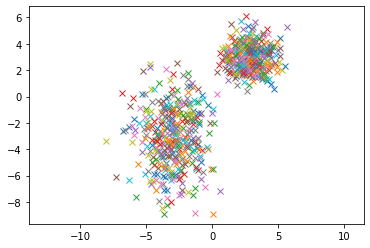

Dataset still has: 500 points


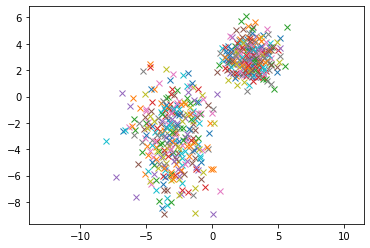

Dataset still has: 400 points


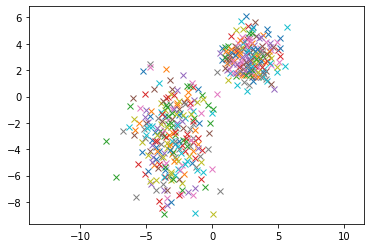

Dataset still has: 300 points


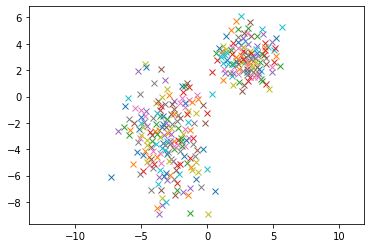

Dataset still has: 200 points


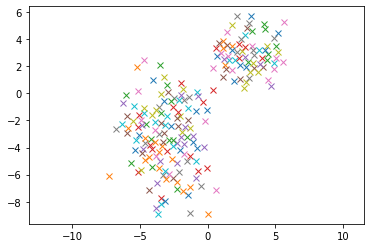

Dataset still has: 100 points


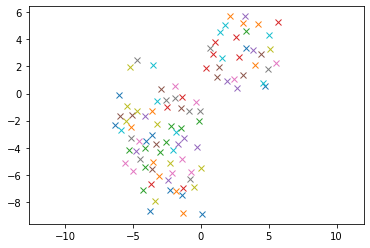

Dataset still has: 2 points


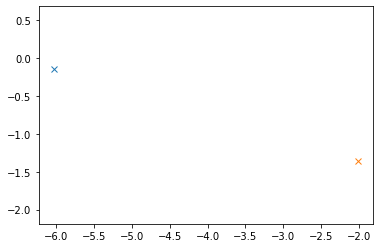

Took 154.02584469999783 seconds


In [162]:
e = Environment()
e.generatedataset()

list_of_points = e.generatepoints()

start = timeit.default_timer()

while(len(list_of_points) > 2):
    
    # Brute force search
    vals = e.brute_search(list_of_points)
    
    # removes the points from the list
    del list_of_points[vals[3]]
    
    # calculates the mean and adds it to the list
    list_of_points.append(e.mean(vals[1], vals[2]))
    
    del list_of_points[vals[4]]
    
    if(len(list_of_points) % 100) == 0:
        print('Dataset still has:', len(list_of_points), 'points')
        for p in list_of_points:
            plt.plot(p.x, p.y, 'x')
            plt.axis('equal')
        plt.show()
        plt.clf()
        
stop = timeit.default_timer()
time = stop - start    

print('Dataset still has:', len(list_of_points), 'points')        
for p in list_of_points:
    plt.plot(p.x, p.y, 'x')
    plt.axis('equal')
plt.show()

print('Took', time, 'seconds') 

# EX 4

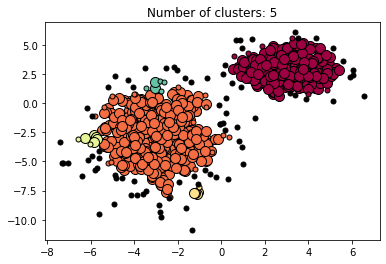

In [4]:
from sklearn.cluster import DBSCAN

e = Environment()
e.generatedataset()
list_of_points = e.dataset.T
 
epsilon = 0.5
minpoints = 4

db = DBSCAN(eps = epsilon, min_samples = minpoints).fit(list_of_points)
labels = db.labels_

core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True

n_clusters_ = len( set(labels) ) - (1 if -1 in labels else 0)

# Black color removed and is used for noise instead.
n_noise_ = list(labels).count(-1)
unique_labels = set(labels)

#returns the color map
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, c in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        c = [0, 0, 0, 1]

    class_member_mask = labels == k
    
    #plots core points
    xy = list_of_points[class_member_mask & core_samples_mask]
    plt.plot( xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(c), markeredgecolor = 'k', markersize = 10)

    #plots border points points
    xy = list_of_points[class_member_mask & ~core_samples_mask]
    plt.plot( xy[:, 0],  xy[:, 1], "o", markerfacecolor = tuple(c), markeredgecolor = 'k', markersize = 5)

plt.title('Number of clusters: %d' % n_clusters_)
plt.show()